In [1]:
import pandas as pd
import json
import folium
import matplotlib.pyplot as plt
import seaborn as sns

## Visualization by folium

In [2]:
with open('200221_seoul_rental_houses.json', 'r') as fp:
    geocode_list = json.load(fp)
    pass

geocode_company = geocode_list.pop(0)

In [3]:
map1 = folium.Map((geocode_company['geometry']['location']['lat'],
            geocode_company['geometry']['location']['lng']),
          zoom_start=12)

# Marker for center
folium.Marker([geocode_company['geometry']['location']['lat'], geocode_company['geometry']['location']['lng']], 
              popup=geocode_company['original_addr'],
              tooltip='my_com', 
              icon=folium.Icon(color='red')).add_to(map1)

# Markers for rental houses
for idx, tmp_dict in enumerate(geocode_list):
    tmp_lat = tmp_dict['geometry']['location']['lat']
    tmp_lng = tmp_dict['geometry']['location']['lng']
    tmp_msg = f'{idx+1}. {tmp_dict["original_addr"]}'
    folium.Marker([tmp_lat, tmp_lng], popup=tmp_msg).add_to(map1)
map1.save('200221_seoul_rental_houses.html')
map1

## Table analysis

In [4]:
data = pd.read_csv('data/20년1차_청년매입임대_주택내역(정정)_수정편집.csv', encoding='cp949')

print(data.shape, end=' -> ')
data = data[data['지역본부']== '서울지역본부']
data = data[data['성별전용']!= '여성전용']
data = data[data['공급형']== '단독(1인)']
data = data[data['주소'].str.match('서울특별시 영등포구')]
data = data[['주소', '호수', '전용\r\n면적(㎡)', '주거공용\r\n면적(㎡)', '면적계(㎡)', ' 월임대료(원) ']].reset_index(drop=True)
data.columns = ['address', 'room_no', 'room_area', 'public_area', 'total_area', 'rental_fee']
print(data.shape, '\n')
print(data['address'].value_counts())

data.head(1)

(1161, 16) -> (30, 6) 

서울특별시 영등포구 영등포로49길 9-14(영등포동2가) 101동    26
서울특별시 영등포구 영등포로49길 9-14(영등포동2가) 102동     4
Name: address, dtype: int64


,address,room_no,room_area,public_area,total_area,rental_fee
0,서울특별시 영등포구 영등포로49길 9-14(영등포동2가) 101동,201,24.16,29.31,53.46,"372,060"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      30 non-null     object 
 1   room_no      30 non-null     object 
 2   room_area    30 non-null     float64
 3   public_area  30 non-null     float64
 4   total_area   30 non-null     float64
 5   rental_fee   30 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.5+ KB


In [6]:
data.address = [addr[-4:] for addr in data.address]
data.room_no = [no[0] for no in data.room_no]
data.room_no = data.room_no.astype(int)
data.rental_fee = data.rental_fee.str.replace(',','').astype(int)
data = data.rename( columns={'room_no' : 'floor'} )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      30 non-null     object 
 1   floor        30 non-null     int32  
 2   room_area    30 non-null     float64
 3   public_area  30 non-null     float64
 4   total_area   30 non-null     float64
 5   rental_fee   30 non-null     int32  
dtypes: float64(3), int32(2), object(1)
memory usage: 1.3+ KB


In [7]:
data.sort_values(['rental_fee'])

,address,floor,room_area,public_area,total_area,rental_fee
9,101동,4,23.58,28.58,52.16,367170
15,101동,7,23.58,28.58,52.16,371500
0,101동,2,24.16,29.31,53.46,372060
3,101동,3,24.16,29.31,53.46,376390
6,101동,4,24.16,29.31,53.46,376390
1,101동,2,24.97,30.10,55.07,383590
4,101동,3,24.97,30.10,55.07,387930
5,101동,3,24.97,30.10,55.07,387930
7,101동,4,24.97,30.10,55.07,387930
8,101동,4,24.97,30.10,55.07,387930


In [8]:
data.corr()

,floor,room_area,public_area,total_area,rental_fee
floor,1.000000,-0.268487,-0.437045,-0.400547,0.545574
room_area,-0.268487,1.000000,0.875725,0.933530,-0.232647
public_area,-0.437045,0.875725,1.000000,0.990603,-0.664659
total_area,-0.400547,0.933530,0.990603,1.000000,-0.559413
rental_fee,0.545574,-0.232647,-0.664659,-0.559413,1.000000


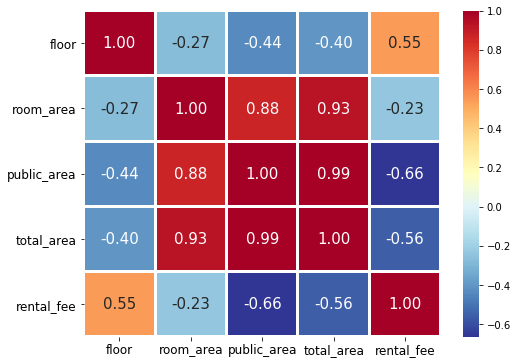

In [9]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(data.corr(), annot=True, annot_kws={'size':15},
                 linewidths=2, fmt='.2f', cmap='RdYlBu_r')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.tick_params(which='major', labelsize=12)
plt.yticks(rotation=0)

plt.show()

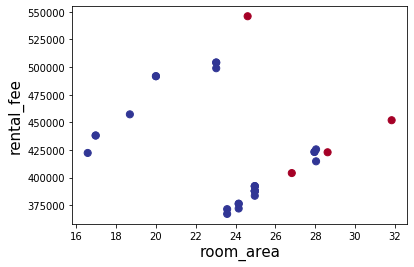

In [10]:
ax = plt.scatter( data.room_area, data.rental_fee, s=50, c=[0 if addr=='101동' else 1 for addr in data.address], cmap='RdYlBu_r' )
plt.xlabel('room_area', fontdict={'size':15})
plt.ylabel('rental_fee', fontdict={'size':15})
plt.show()